In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score 

In [2]:
data_train = pd.read_csv('application_train.csv')
data_test = pd.read_csv('application_test.csv')

In [3]:
df_train = data_train.copy()
df_test = data_test.copy()

In [4]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
df_train.shape

(307511, 122)

In [6]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

df_train['TARGET'] = df_train['TARGET'].apply(lambda x: decode_sentiment(x))

In [10]:
df_train['TARGET'].value_counts()

No Payment Difficulties    282686
Payment Difficulties        24825
Name: TARGET, dtype: int64

In [11]:
norm_y = df_train['TARGET'].value_counts(normalize=True)
norm_y

No Payment Difficulties    0.919271
Payment Difficulties       0.080729
Name: TARGET, dtype: float64

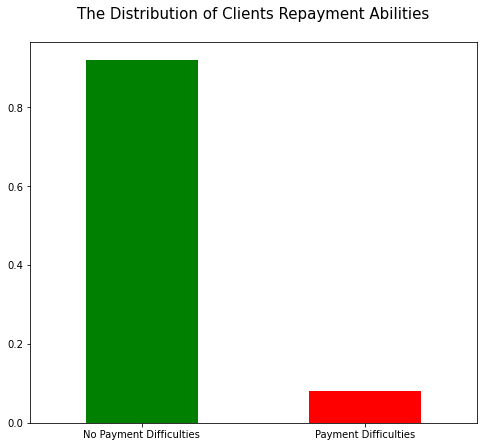

In [12]:
fig = plt.figure(figsize = (8,7))
norm_y.plot(kind='bar', color= ['green','red'], rot = 0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=15)
plt.show()

**Categorical Features vs Target**

Contract Type, Gender, Car Ownership, Reality Ownership

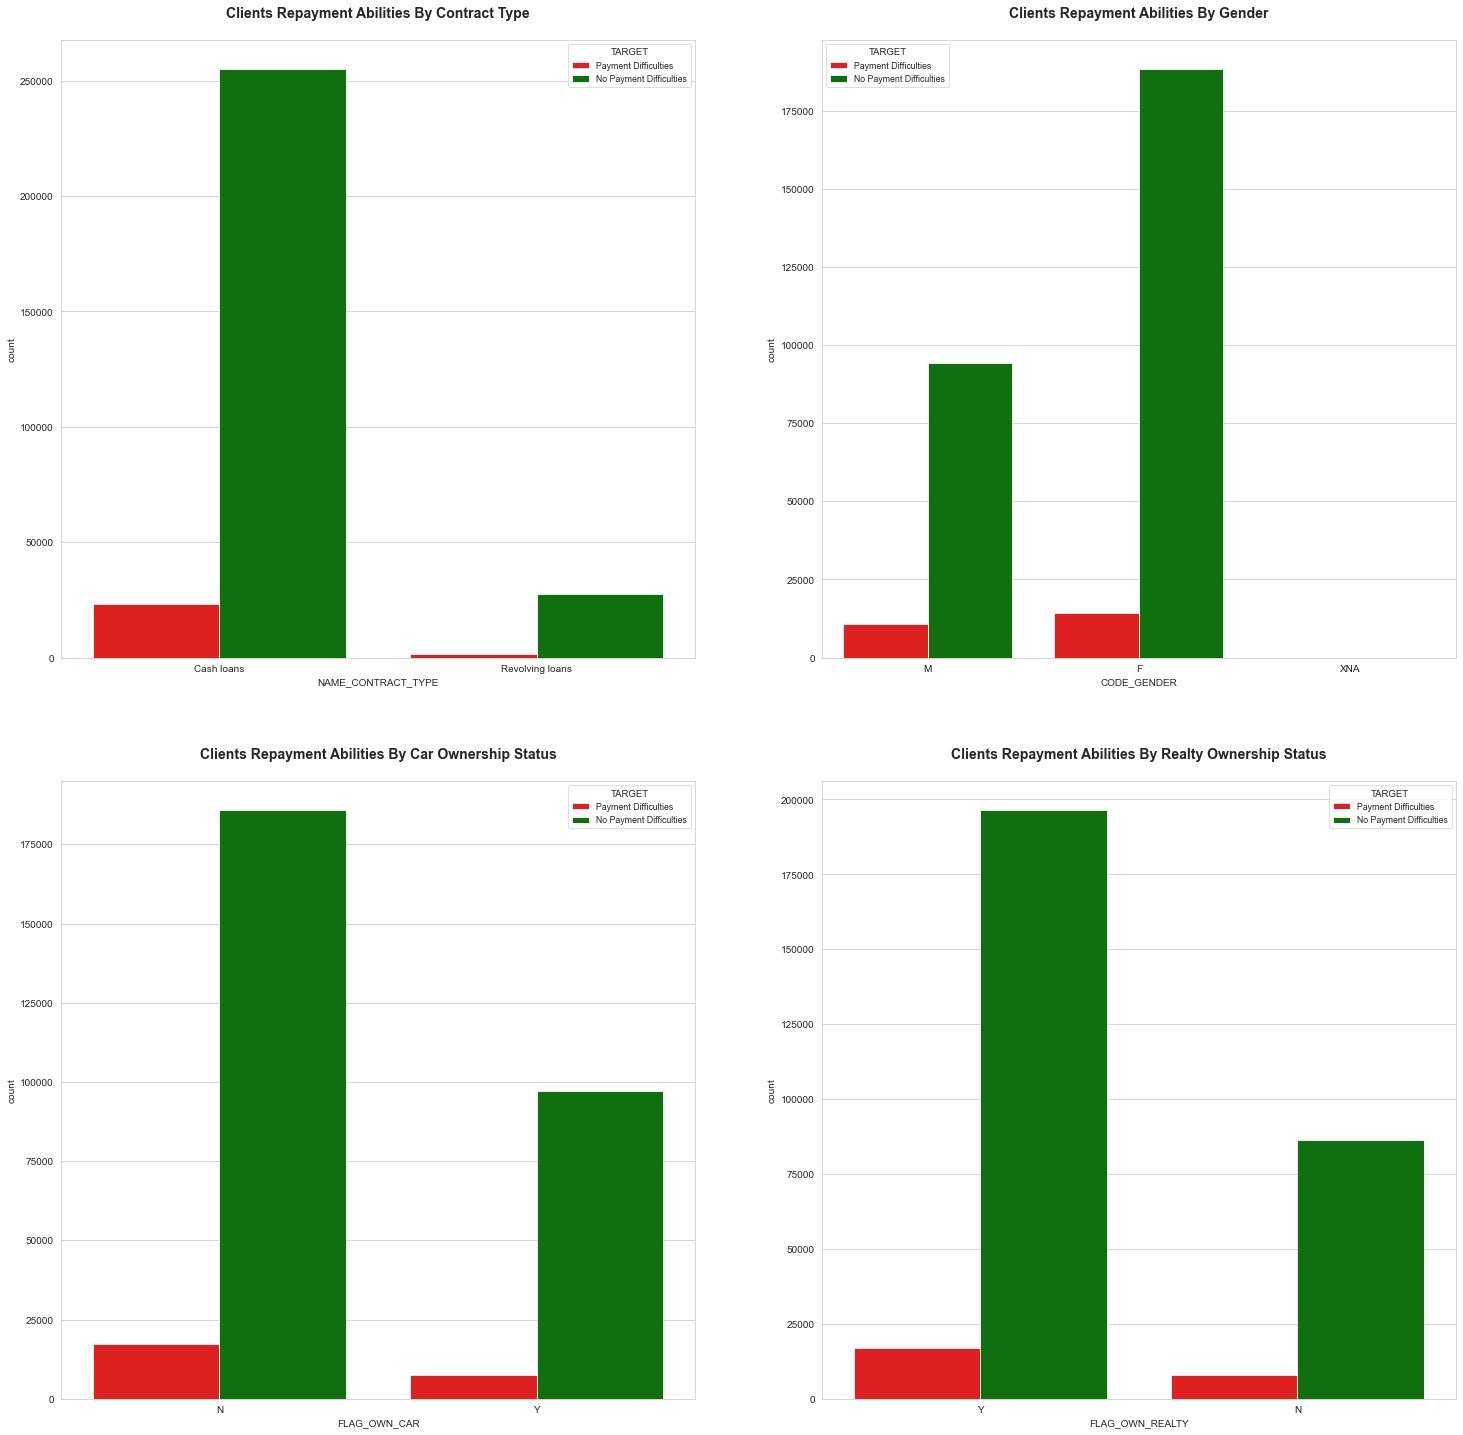

In [13]:
# Contract Type, Gender, Car Owernship, Reality Ownership vs Target Visualization
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = df_train, hue = 'TARGET', palette = ['red', 'green'], ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = df_train, hue = 'TARGET', palette = ['red', 'green'], ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = df_train, hue = 'TARGET', palette = ['red', 'green'], ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = df_train, hue = 'TARGET', palette = ['red', 'green'], ax=ax[1][1])

**Contract Type vs Target**

In [14]:
#Clients Repayment Abilities By Contract Type
ct = df_train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
ct.sort_values(by='SK_ID_CURR', ascending=False)

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
2,Revolving loans,No Payment Difficulties,27675
1,Cash loans,Payment Difficulties,23221
3,Revolving loans,Payment Difficulties,1604


Cash loans with 278,232 loans making up the majority of the total loans in this data set. Revolving loans have a much lower amount of 29,279 compared to cash loans.

**Gender vs Target**

In [15]:
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace(['F','M'],['Female','Male'])

#Clients Repayment Abilities By Gender
gender = df_train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
gender.sort_values(by='SK_ID_CURR', ascending=False)

,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Payment Difficulties,188278
2,Male,No Payment Difficulties,94404
1,Female,Payment Difficulties,14170
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


In [16]:
data_train[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'], as_index = False).mean().sort_values(by = ['TARGET'], ascending = False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


Based on the data, Female has the highest number of loans applications rather than Male, however male has the highest difficulty repayment the loans.

**Car Ownership vs Target**

In [17]:
df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].replace(['Y', 'N'], ['Yes', 'No'])

#Clients Repayment Abilities by Car Ownership
car = df_train.groupby(['FLAG_OWN_CAR', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
car.sort_values(by = 'SK_ID_CURR', ascending = False)

,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,185675
2,Yes,No Payment Difficulties,97011
1,No,Payment Difficulties,17249
3,Yes,Payment Difficulties,7576


In [18]:
data_train[['FLAG_OWN_CAR', 'TARGET']].groupby('FLAG_OWN_CAR', as_index = False).mean().sort_values('TARGET', ascending = False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


Most of the client doesn't have a car. The customers who own a car has a difficulty repaying the loans than the customers who don't own a car.

**Realty Ownership vs Target**

In [19]:
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].replace(['Y', 'N'], ['Yes', 'No'])

#Client Repayment Abilities by Realty Ownership
realty = df_train.groupby(['FLAG_OWN_REALTY', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
realty.sort_values('SK_ID_CURR', ascending = False)

,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
2,Yes,No Payment Difficulties,196329
0,No,No Payment Difficulties,86357
3,Yes,Payment Difficulties,16983
1,No,Payment Difficulties,7842


In [20]:
data_train[['FLAG_OWN_REALTY', 'TARGET']].groupby(['FLAG_OWN_REALTY'], as_index = False).mean().sort_values('TARGET', ascending = False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


Customers who own houses/flats has difficulty repaying the loans rather than customers who don't own the houses/flats.

**Suite Type, Income Type, Education Type, and Family Status**

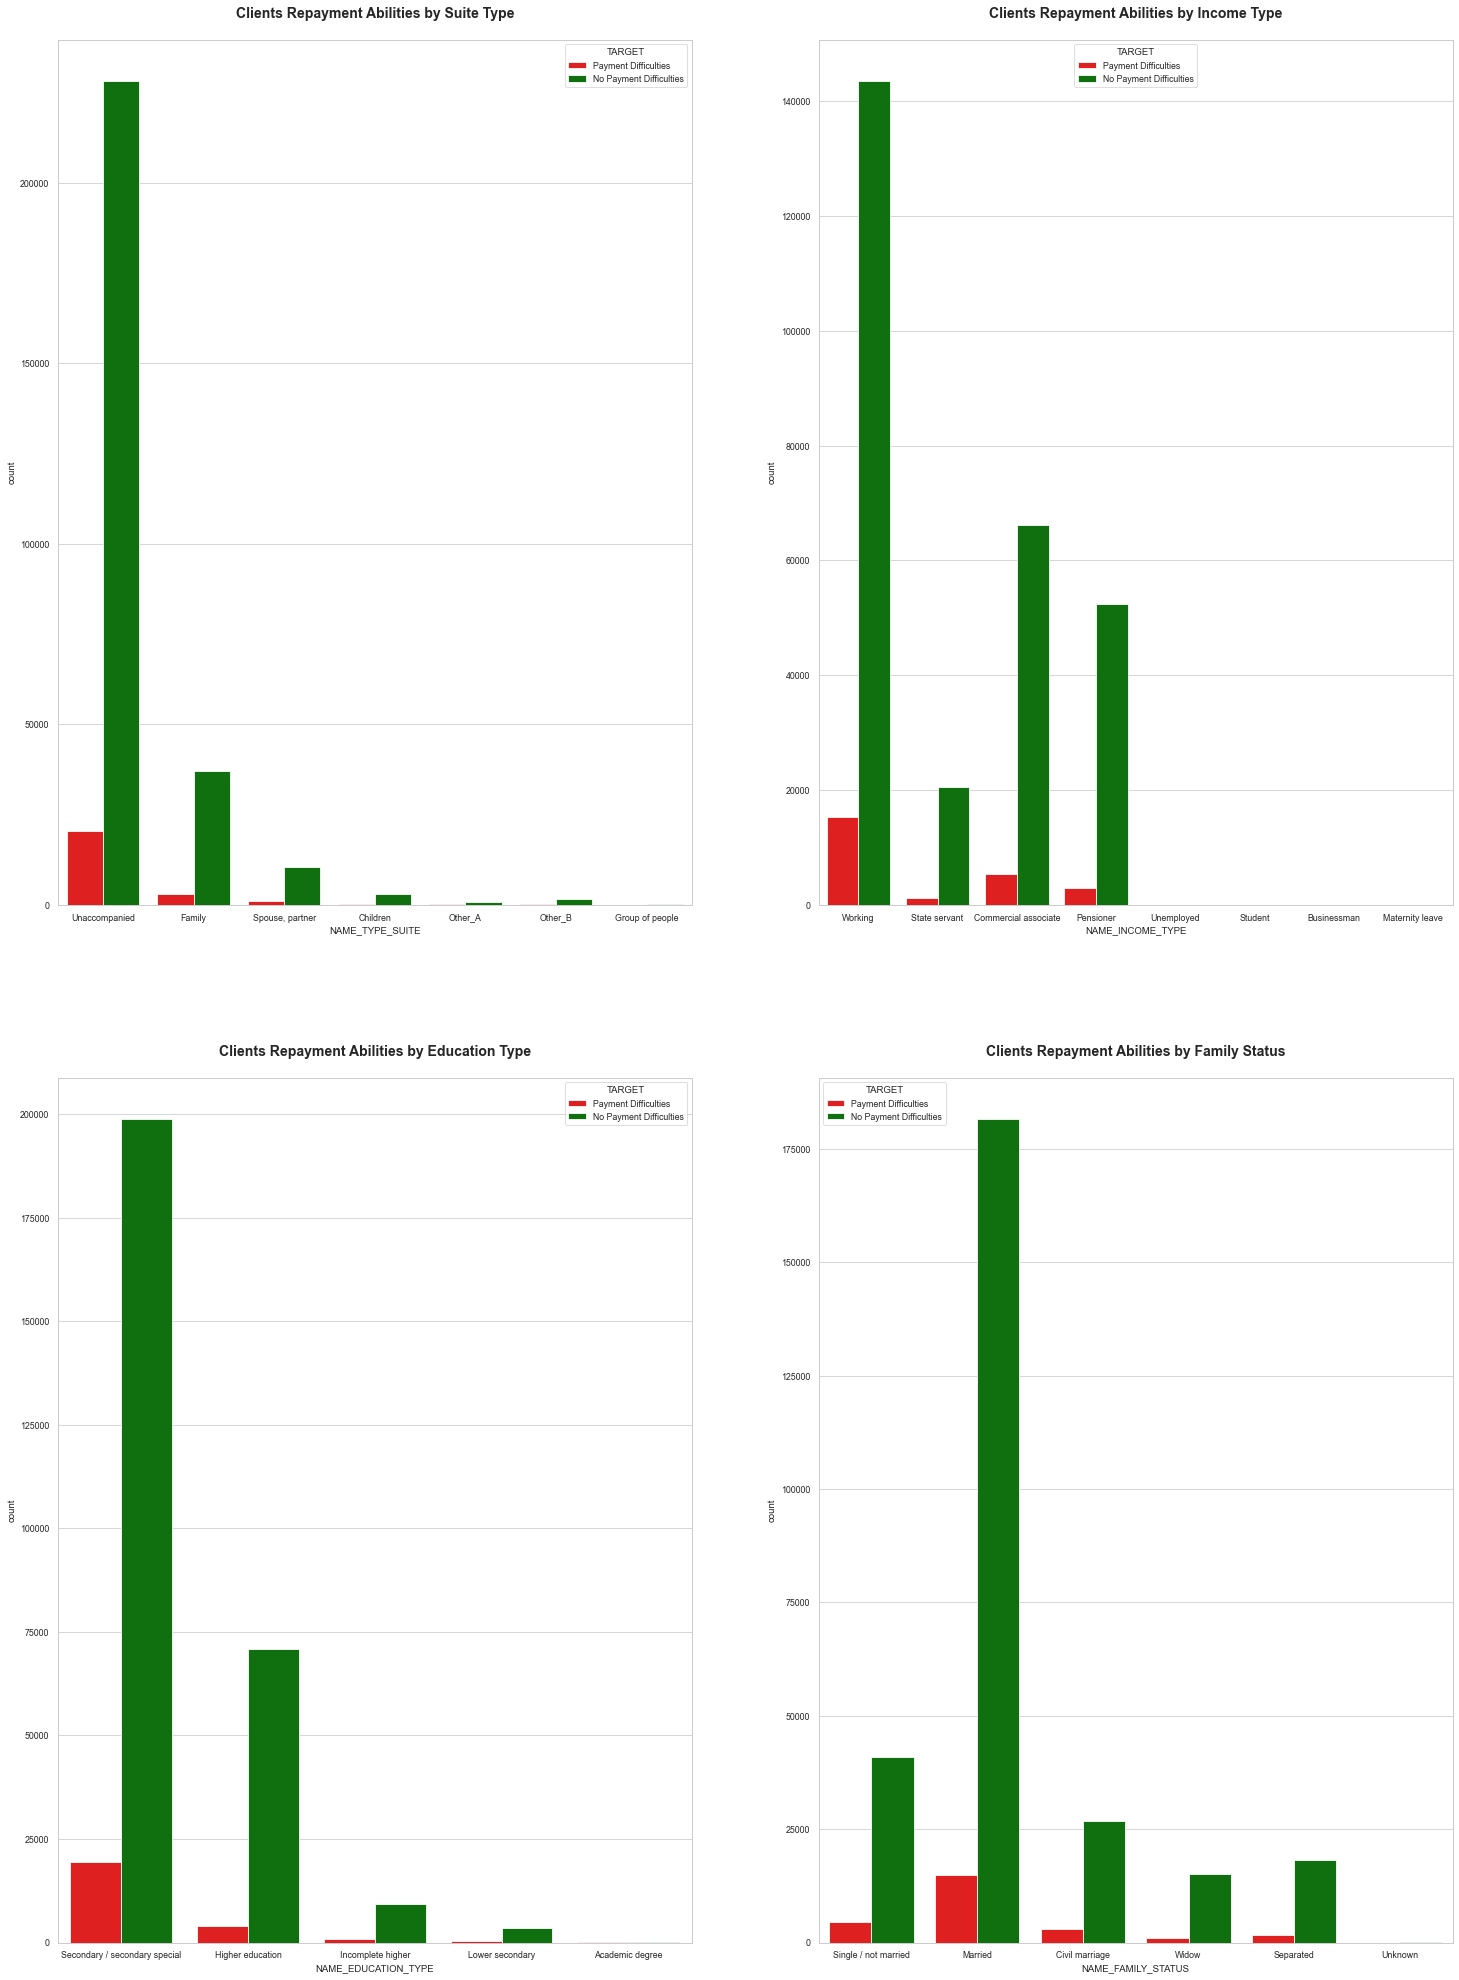

In [21]:
#Suite Type, Income Type, Education Type, Family Status vs Target Visualization
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 35))
sns.set_context('paper', font_scale = 1)

ax[0][0].set_title('Clients Repayment Abilities by Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data=df_train, hue='TARGET', palette = ['red', 'green'], ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities by Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data=df_train, hue='TARGET', palette = ['red', 'green'], ax=ax[0][1])

ax[1][0].set_title('Clients Repayment Abilities by Education Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data=df_train, hue='TARGET', palette = ['red', 'green'], ax=ax[1][0])

ax[1][1].set_title('Clients Repayment Abilities by Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=df_train, hue='TARGET', palette = ['red', 'green'], ax=ax[1][1])

**Suite Type vs Target**

In [22]:
#Clients Repayment Abilities by Suite Type
suite = df_train.groupby(['NAME_TYPE_SUITE','TARGET'], as_index = False)['SK_ID_CURR'].count()
suite.sort_values('SK_ID_CURR', ascending = False)

,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
12,Unaccompanied,No Payment Difficulties,228189
2,Family,No Payment Difficulties,37140
13,Unaccompanied,Payment Difficulties,20337
10,"Spouse, partner",No Payment Difficulties,10475
0,Children,No Payment Difficulties,3026
3,Family,Payment Difficulties,3009
8,Other_B,No Payment Difficulties,1596
11,"Spouse, partner",Payment Difficulties,895
6,Other_A,No Payment Difficulties,790
4,Group of people,No Payment Difficulties,248


In [23]:
data_train[['NAME_TYPE_SUITE', 'TARGET']].groupby(['NAME_TYPE_SUITE'], as_index = False).mean().sort_values('TARGET', ascending = False) 

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Clients who were in the other_b had a higher percentage of difficulty in repaying the loan.

**Income Type vs Target**

In [24]:
#Client Repayment Abilities by Income Type
income = df_train.groupby(['NAME_INCOME_TYPE','TARGET'], as_index= False)['SK_ID_CURR'].count()
income.sort_values(['SK_ID_CURR'], ascending = False)

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,No Payment Difficulties,143550
1,Commercial associate,No Payment Difficulties,66257
5,Pensioner,No Payment Difficulties,52380
7,State servant,No Payment Difficulties,20454
13,Working,Payment Difficulties,15224
2,Commercial associate,Payment Difficulties,5360
6,Pensioner,Payment Difficulties,2982
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18
10,Unemployed,No Payment Difficulties,14


In [25]:
  data_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'], as_index = False).mean().sort_values(['TARGET'], ascending = False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


Customers with business and student income types do not have difficulty paying off their loans. While clients who are on maternity leave and unemployed have the highest percentage having problems repaying the loan.

**Education Type vs Target**

In [26]:
#Clients Repayment Abilities by Education Type
edu = df_train.groupby(['NAME_EDUCATION_TYPE', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
edu.sort_values(['SK_ID_CURR'], ascending = False)

,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,No Payment Difficulties,198867
2,Higher education,No Payment Difficulties,70854
9,Secondary / secondary special,Payment Difficulties,19524
4,Incomplete higher,No Payment Difficulties,9405
3,Higher education,Payment Difficulties,4009
6,Lower secondary,No Payment Difficulties,3399
5,Incomplete higher,Payment Difficulties,872
7,Lower secondary,Payment Difficulties,417
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3


In [27]:
data_train[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE'],  as_index = False).mean().sort_values(['TARGET'], ascending = False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


A large number of applications were submitted by clients having secondary education followed by people with higher education with 75K applications.

**Family Status vs Target**

In [28]:
#Clients Repayment Abilities by Family Status
family = df_train.groupby(['NAME_FAMILY_STATUS', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
family.sort_values(['SK_ID_CURR'], ascending = False)

,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,No Payment Difficulties,181582
6,Single / not married,No Payment Difficulties,40987
0,Civil marriage,No Payment Difficulties,26814
4,Separated,No Payment Difficulties,18150
9,Widow,No Payment Difficulties,15151
3,Married,Payment Difficulties,14850
7,Single / not married,Payment Difficulties,4457
1,Civil marriage,Payment Difficulties,2961
5,Separated,Payment Difficulties,1620
10,Widow,Payment Difficulties,937


In [29]:
data_train[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'], as_index = False).mean().sort_values(['TARGET'], ascending = False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


Civil marriage and single/not married has the highest percentage of clients having problem in repaying the loans.

**Housing Type, Occupation Type, Process Day, and Organization Type**

**Housing Type vs Target**

In [30]:
#Cllients Repayment Abilities by Housing Type
housing = df_train.groupby(['NAME_HOUSING_TYPE', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
housing.sort_values(['SK_ID_CURR'], ascending = False)

,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
10,With parents,No Payment Difficulties,13104
4,Municipal apartment,No Payment Difficulties,10228
8,Rented apartment,No Payment Difficulties,4280
6,Office apartment,No Payment Difficulties,2445
11,With parents,Payment Difficulties,1736
0,Co-op apartment,No Payment Difficulties,1033
5,Municipal apartment,Payment Difficulties,955
9,Rented apartment,Payment Difficulties,601


In [31]:
data_train[['NAME_HOUSING_TYPE', 'TARGET']].groupby(['NAME_HOUSING_TYPE'], as_index = False).mean().sort_values(['TARGET'], ascending = False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Clients with housing type of rented apartment has the highest percentage in difficulty in repaying the loans.

Text(0.5, 0, '\nHousing Type')

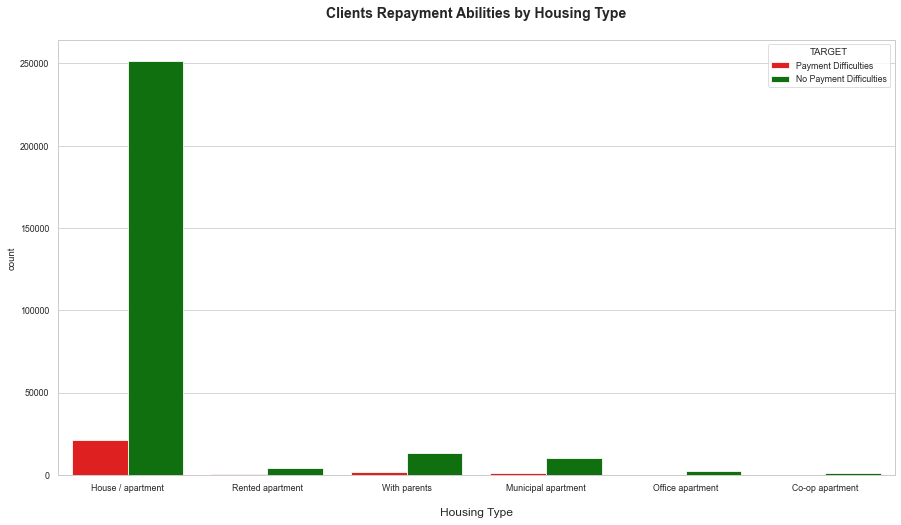

In [32]:
plt.figure(figsize =(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data=df_train, hue = 'TARGET', palette = ['red', 'green'])
plt.title('Clients Repayment Abilities by Housing Type\n', fontweight = 'bold', fontsize = 14)
plt.xlabel('\nHousing Type', fontsize = 12)

Clients that live in house/apartment has the highest number of loan application.

**Occupation Type vs Target**

In [33]:
#Clients Repayment Abilities by Occupation Type
occu = df_train.groupby(['OCCUPATION_TYPE', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
occu.sort_values(['SK_ID_CURR'], ascending = False)

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
16,Laborers,No Payment Difficulties,49348
28,Sales staff,No Payment Difficulties,29010
6,Core staff,No Payment Difficulties,25832
20,Managers,No Payment Difficulties,20043
8,Drivers,No Payment Difficulties,16496
12,High skill tech staff,No Payment Difficulties,10679
0,Accountants,No Payment Difficulties,9339
22,Medicine staff,No Payment Difficulties,7965
32,Security staff,No Payment Difficulties,5999
17,Laborers,Payment Difficulties,5838


In [34]:
data_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'], as_index = False).mean().sort_values(['TARGET'], ascending = False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


The highest percentage of clients with problems in repaying loans are clients with Low-Skilled Worker jobs.

**Process Day vs Target**

In [35]:
#Clients Repayment Abilities by Process Day
process = df_train.groupby(['WEEKDAY_APPR_PROCESS_START', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
process.sort_values(['SK_ID_CURR'], ascending = False)

,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
10,TUESDAY,No Payment Difficulties,49400
12,WEDNESDAY,No Payment Difficulties,47696
2,MONDAY,No Payment Difficulties,46780
8,THURSDAY,No Payment Difficulties,46493
0,FRIDAY,No Payment Difficulties,46237
4,SATURDAY,No Payment Difficulties,31182
6,SUNDAY,No Payment Difficulties,14898
11,TUESDAY,Payment Difficulties,4501
13,WEDNESDAY,Payment Difficulties,4238
1,FRIDAY,Payment Difficulties,4101


In [36]:
data_train[['WEEKDAY_APPR_PROCESS_START', 'TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'], as_index = False).mean().sort_values(['TARGET'], ascending = False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


Text(0.5, 0, '\nProcess Day')

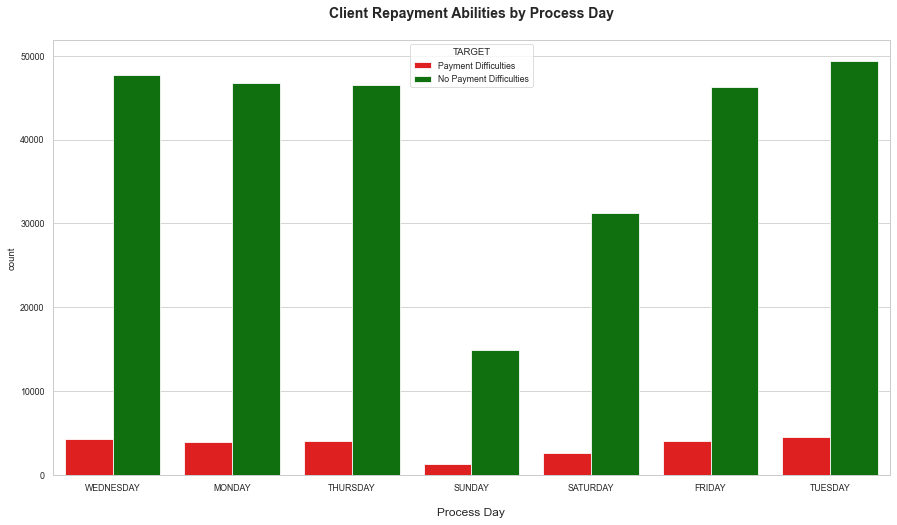

In [37]:
plt.figure(figsize = (15, 8))
fig = sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START', data = df_train, hue='TARGET', palette = ['red', 'green'])
plt.title('Client Repayment Abilities by Process Day\n', fontsize = 14, fontweight = 'bold')
plt.xlabel('\nProcess Day', fontsize = 12)

Based on the data and graphic, every day has a same percentage having a problems repaying the loans.

**Organization Type vs Target**

In [38]:
#Clients Repayment Abilities by Organization Type
organization = df_train.groupby(['ORGANIZATION_TYPE', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
organization.sort_values(['SK_ID_CURR'], ascending = False)

,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
10,Business Entity Type 3,No Payment Difficulties,61669
114,XNA,No Payment Difficulties,52384
84,Self-employed,No Payment Difficulties,34504
66,Other,No Payment Difficulties,15408
60,Medicine,No Payment Difficulties,10456
...,...,...,...
31,Industry: type 10,Payment Difficulties,7
75,Religion,Payment Difficulties,5
51,Industry: type 8,Payment Difficulties,3
99,Trade: type 5,Payment Difficulties,3


In [39]:
data_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'], as_index = False).mean().sort_values(['TARGET'], ascending = False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


Tranport: Type 3 has the highest percentage of difficulty repayment the loans

**Numerical Features vs Target**

**Amount Credit vs Target**

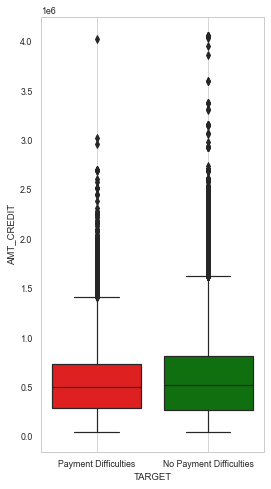

In [40]:
plt.figure(figsize=(4, 8))
sns.boxplot(x = 'TARGET', y = 'AMT_CREDIT', data = df_train, palette = ['red', 'green'])
plt.grid()
plt.show()

Median of the credit amount of the clients who doesn't have payment difficulties is slightly larger than the median of clients who has payment difficulties. It means, the clients with higher credit amount have a slightly higher chances of being capable of repaying the loan than clients with lower credit amount.

**Amount Income vs Target**

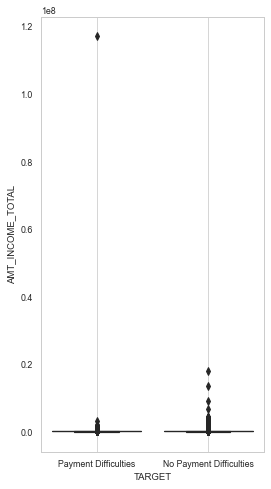

In [41]:
plt.figure(figsize=(4, 8))
sns.boxplot(x = 'TARGET', y = 'AMT_INCOME_TOTAL', data = df_train, palette = ['red', 'green'])
plt.grid()
plt.show()

Both clients who has payment difficulties and clients who doesn't have payment difficulties, mostly have the same value.

**Age vs Target**

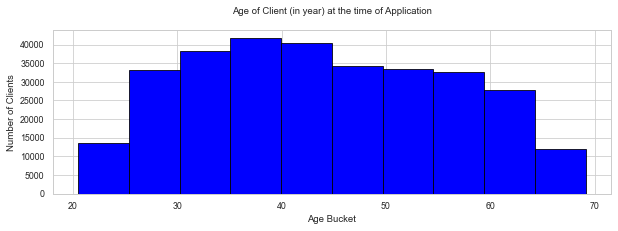

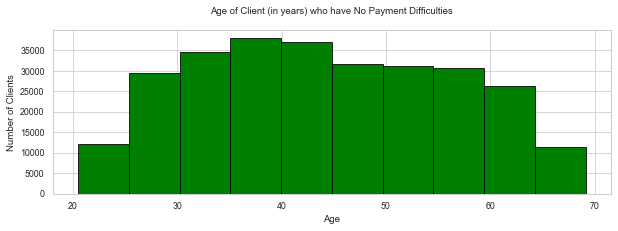

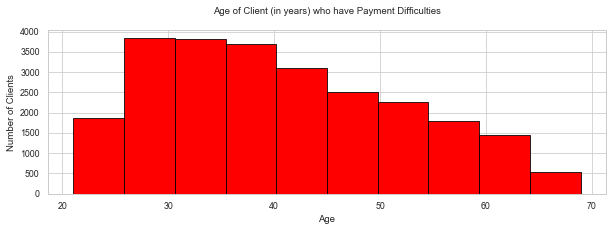

In [42]:
no_age = data_train[data_train['TARGET']==0]['DAYS_BIRTH'].values/-365
diff_age = data_train[data_train['TARGET']==1]['DAYS_BIRTH'].values/-365

plt.figure(figsize = (10,3))
plt.hist(df_train['DAYS_BIRTH'].values/-365, bins = 10, edgecolor='black', color='blue')
plt.title('Age of Client (in year) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='green')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(diff_age, bins=10, edgecolor='black', color='red')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

The number of highest customers who applied the loans is around 30 - 40 years old. Meanwhile, the lowest number of applicants for clients aged under 25 years and over 65 years old.
Clients who doesn't have payment difficulties are client aged beetween 35 - 45 years old. Meanwhile, clients who has payment difficulties are clients aged around 25-35 years.

**Multivariate Visualization**

**Group by Realty Ownership Status**

**Income Type, Amount of Goods Price, Target, and House/Flat Ownership**

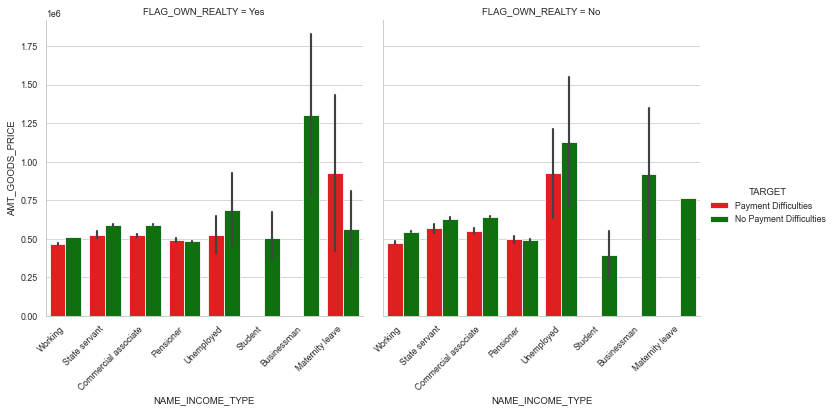

In [43]:
fig = sns.catplot( x = 'NAME_INCOME_TYPE',
                 y = 'AMT_GOODS_PRICE',
                 hue = 'TARGET',
                 col = 'FLAG_OWN_REALTY',
                 kind= 'bar',
                 data = df_train,
                 palette = ['red', 'green'])

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients with maternity leave income types who own a house/flat (FLAG_OWN_REALTY = Yes) has a problems repaying the loans compared to those who doesn't have a house/flat (FLAG_OWN_REALTY = No)

**Car Ownership Status, Children Number, Target, and House/Flat Ownership Status**

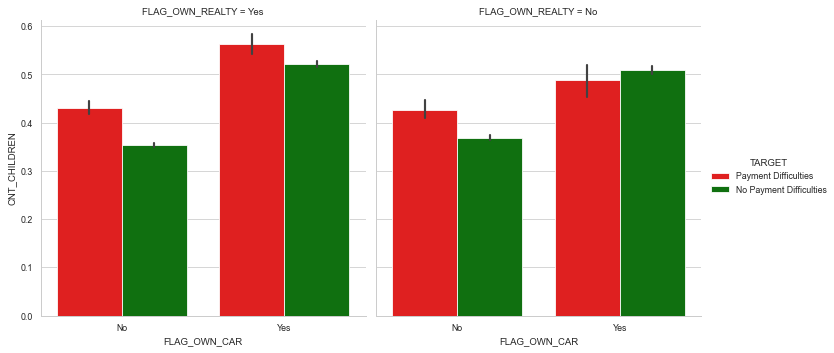

In [44]:
sns.catplot(x = 'FLAG_OWN_CAR',
           y = 'CNT_CHILDREN',
           hue = 'TARGET',
           col = 'FLAG_OWN_REALTY',
           kind = 'bar',
           palette = ['red', 'green'],
           data = df_train)
plt.show()

Clients who own cars and houses/flats has problem to repay the loans for a high number of children rather than client who doesn't have house/flat.

**Family Status, Amount of Income, Target, and House/Flat Ownership Status**

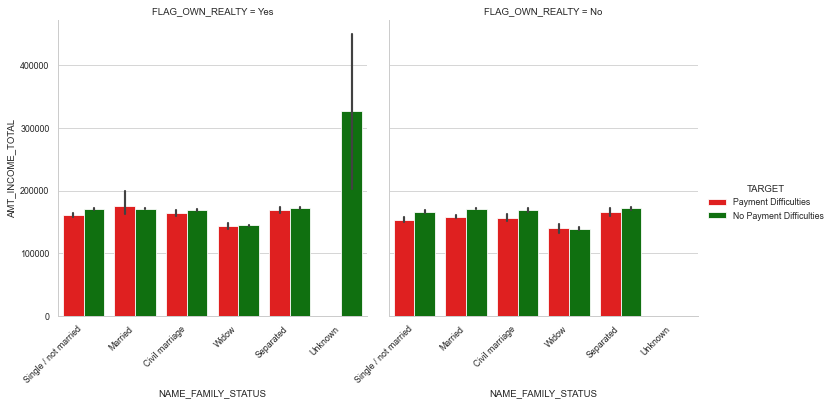

In [45]:
fig = sns.catplot(x='NAME_FAMILY_STATUS',
                 y='AMT_INCOME_TOTAL',
                 hue='TARGET',
                 col = 'FLAG_OWN_REALTY',
                 kind='bar',
                 data=df_train,
                 palette=['red','green'])

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Married clients who owned a house/flat has a problem repaying the loans for medium income compared to clients who doesn't own a house/flat.

**Grouped by Car Ownership Status**

Contract Type, Children Number, Target, and Car Ownership Status

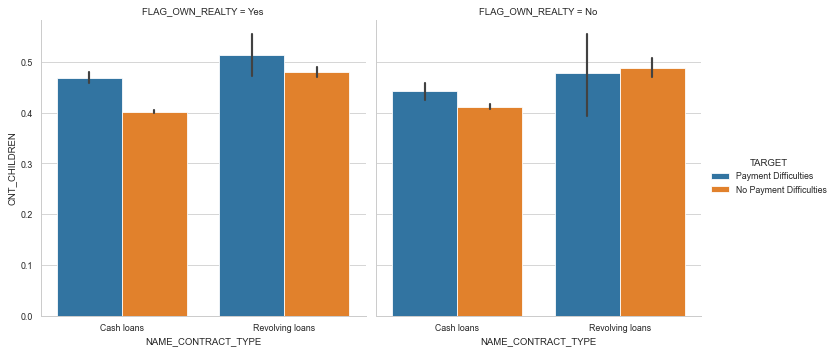

In [46]:
sns.catplot(x='NAME_CONTRACT_TYPE',
           y='CNT_CHILDREN',
           hue='TARGET',
           col='FLAG_OWN_REALTY',
           kind='bar',
           data=df_train)
plt.show()

For revolving loans in FLAG_OWN_CAR = No has problems repaying the loan compared to when FLAG_OWN_CAR = Yes.

**Grouped by Contract Type**

Income Type, Amount of Credit, Target, and Contract Type

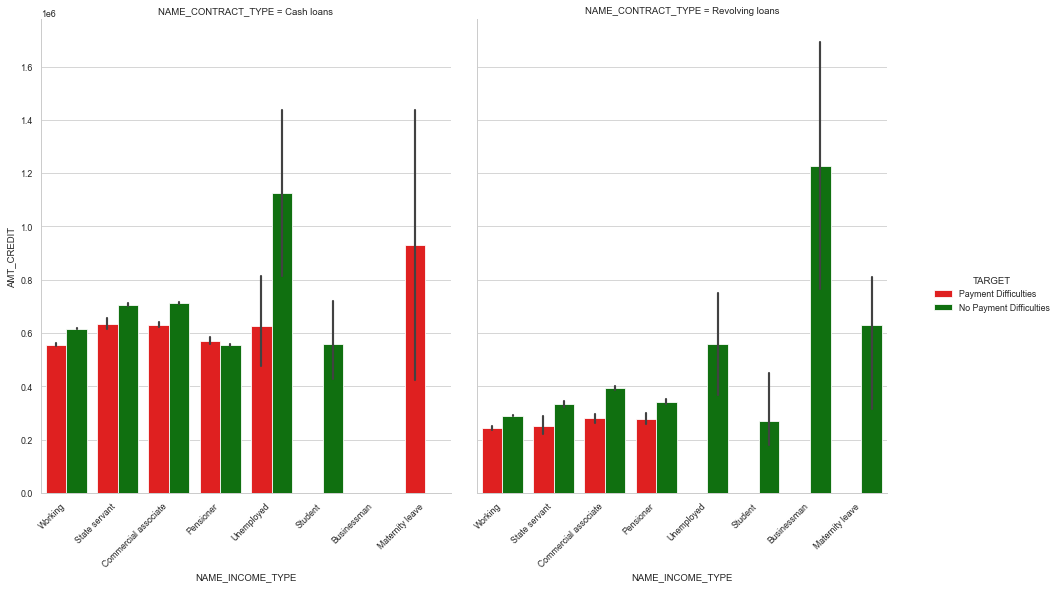

In [47]:
fig = sns.catplot(x='NAME_INCOME_TYPE',
                 y='AMT_CREDIT',
                 hue='TARGET',
                 col='NAME_CONTRACT_TYPE',
                 kind='bar',
                 data=df_train,
                 palette=['red','green'])

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

For the income type of maternity leave with cash loans, all clients have problems repaying loans for medium credit loan amounts. While all clients on maternity leave and revolving loans have no difficulty repaying the loan.

For unemployed clients with cash loans, more than 50% of clients have problems repaying loans with medium credit amounts from loans. While all unemployed clients with revolving loans have no difficulty repaying the loan.

All student clients have no difficulty repaying loans either with cash loans or revolving loans for low to medium loan amounts.

**Grouped by Rating of Region where Client Lives**

**Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

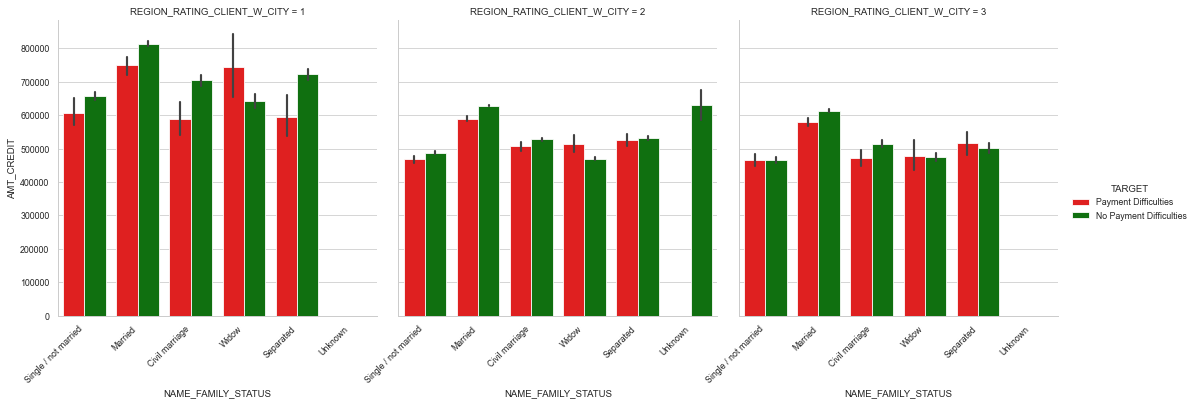

In [48]:
fig = sns.catplot(x='NAME_FAMILY_STATUS',
                 y='AMT_CREDIT',
                 hue='TARGET',
                 col='REGION_RATING_CLIENT_W_CITY',
                 kind='bar',
                 data=df_train,
                 palette=['red','green'])

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients who are widowed, whether domiciled in areas with a rating of 1, 2, or 3 have difficulty paying off loans for moderate to high loan amounts.

Clients who have separate family status, and live in areas rated 3, have problems repaying loans for a moderate amount of loan credit compared to clients who live in areas rated 1 or 2.

**Housing Type, Amount Credit of Loan, Target, and Region Rating**

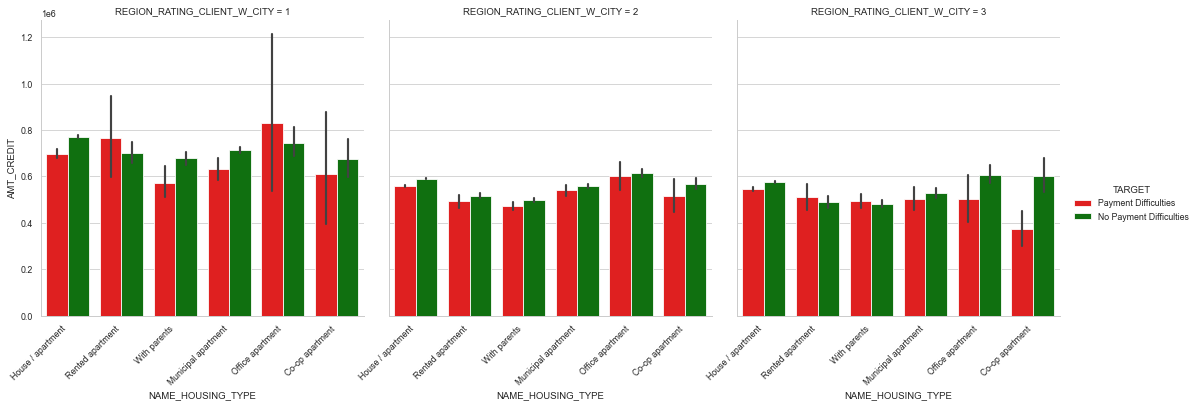

In [49]:
fig = sns.catplot(x='NAME_HOUSING_TYPE',
                 y='AMT_CREDIT',
                 hue='TARGET',
                 col='REGION_RATING_CLIENT_W_CITY',
                 kind='bar',
                 data=df_train,
                 palette=['red','green'])

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients who rented apartments and office apartments where the are has a rating of 1, has porblems to repay the loan than the clients in the region that rated 2 for the medium credit amount of the loan.

**Education Type, Amount Credit of Loan, Target, Region Rating**

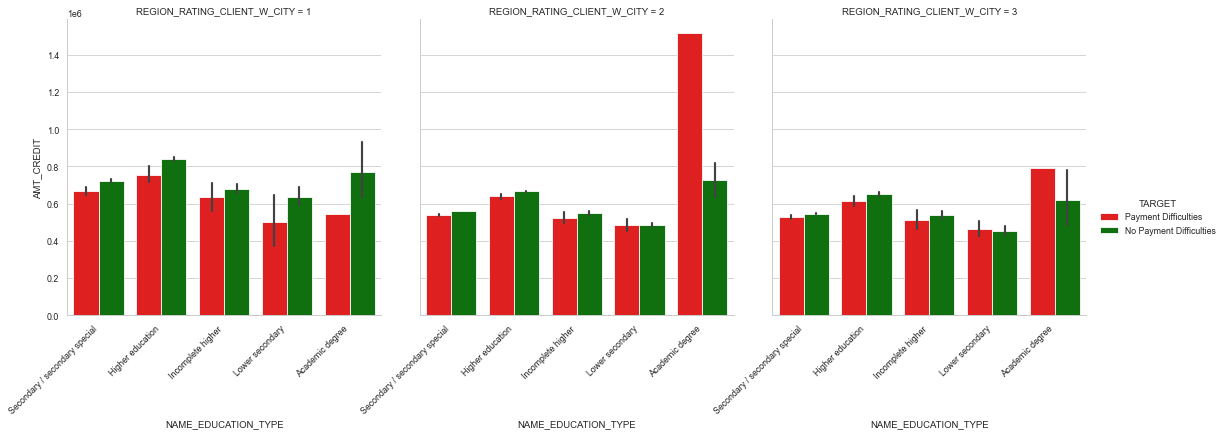

In [50]:
fig = sns.catplot(x='NAME_EDUCATION_TYPE',
                 y='AMT_CREDIT',
                 hue='TARGET',
                 col='REGION_RATING_CLIENT_W_CITY',
                 kind='bar',
                 data=df_train,
                 palette=['red','green'])

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Academic degree clients who live in area rated 2 has problem to repay the loans for higher credit amounts.

## **Data Cleaning**

Detecting data duplication

In [54]:
print('Data duplication', df_train.duplicated().sum())

Data duplication 0


Tidak terdapat duplikasi data

**Detecting Missing Values**

In [55]:
# check for empty elements
print('Missing values status:', df_train.isnull().values.any())
mv = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df_train.shape[0])*100
mv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...,...
117,NAME_HOUSING_TYPE,0,0.000000
118,NAME_FAMILY_STATUS,0,0.000000
119,NAME_EDUCATION_TYPE,0,0.000000
120,NAME_INCOME_TYPE,0,0.000000


In [56]:
# drop features that contain large number of missing values (± 50%)
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [58]:
# after drop some features
print('Missing values status:', df_train.isnull().values.any())
mv = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df_train.shape[0])*100
mv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
...,...,...,...
68,FLAG_DOCUMENT_18,0,0.000000
69,FLAG_DOCUMENT_17,0,0.000000
70,FLAG_DOCUMENT_16,0,0.000000
71,FLAG_DOCUMENT_15,0,0.000000


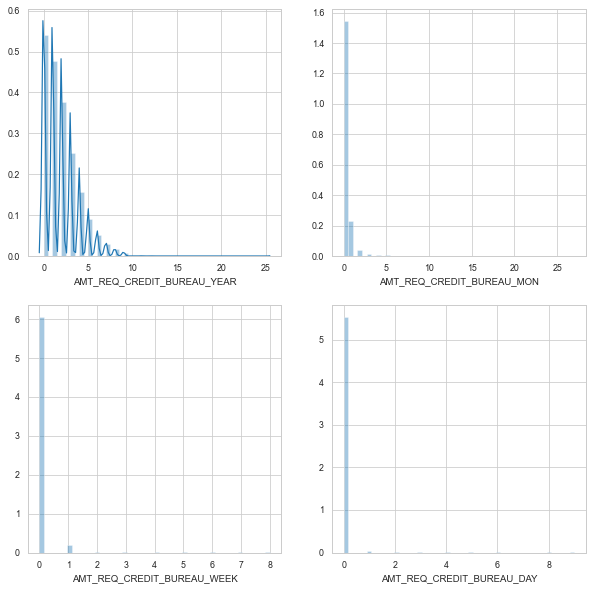

In [59]:
# distribution of numerical features that have missing values pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

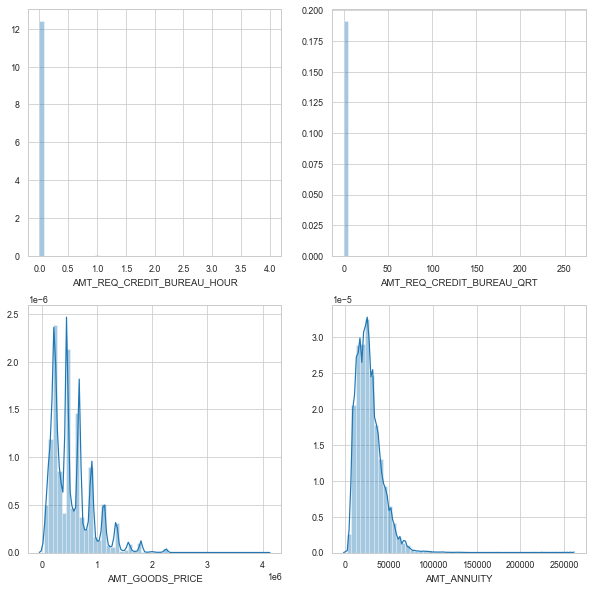

In [60]:
# distribution of numerical features that have missing values pt.2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])

sns.distplot(df_train['AMT_GOODS_PRICE'], ax=ax[1][0])

sns.distplot(df_train['AMT_ANNUITY'], ax=ax[1][1])

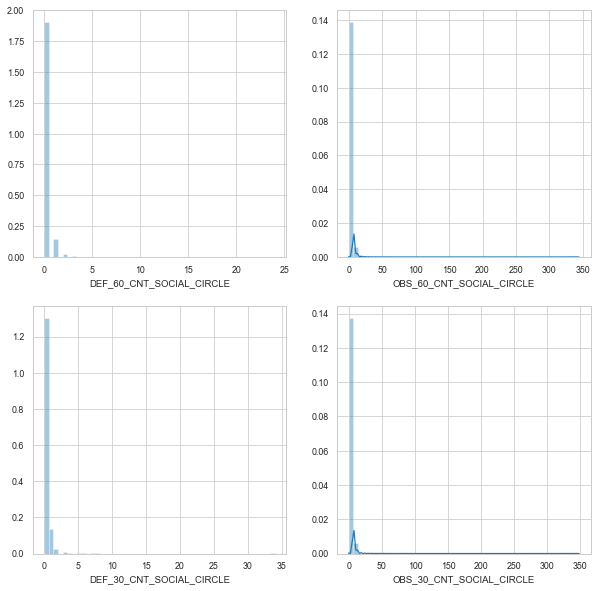

In [61]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(df_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])
     

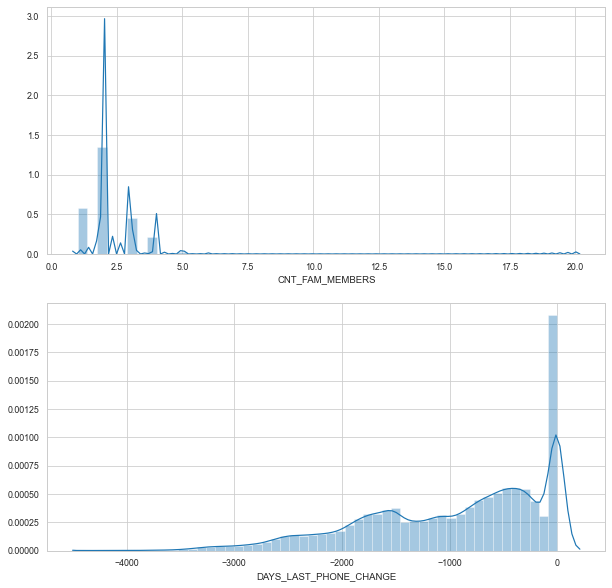

In [62]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[0])

sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

In [64]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

In [66]:
# after imputation
print('Missing values status:', df_train.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
mv = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df_train.shape[0])*100
mv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False

The number of missing values for each columns (after imputation): 



,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0
...,...,...,...
68,FLAG_DOCUMENT_20,0,0.0
69,FLAG_DOCUMENT_21,0,0.0
70,AMT_REQ_CREDIT_BUREAU_HOUR,0,0.0
71,AMT_REQ_CREDIT_BUREAU_DAY,0,0.0


## **MODELING**

In [67]:
# label encoder for object features
df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [68]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Payment Difficulties,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,No Payment Difficulties,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,No Payment Difficulties,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,No Payment Difficulties,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,No Payment Difficulties,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df_train['TARGET'] = data_train['TARGET']

In [70]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Converting Negative Values to Positive Values**

In [71]:
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,45] = df_train.iloc[:,45].abs()

**Feature Selection**

In [72]:
X = df_train[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and 
         col not in ['TARGET', 'SK_ID_CURR']]]
y = df_train['TARGET']

In [73]:
print(X.shape)
print(y.shape)

(307511, 71)
(307511,)


**Handling Imbalance Data**

In [74]:
#Oversampling SMOTE
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [81]:
print(y_over_SMOTE.value_counts())

1    282686
0    282686
Name: TARGET, dtype: int64


**Data Splitting**

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(395760, 71) (169612, 71)


In [83]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Model

**Logistic Regression**

In [84]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [85]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83    197841
           1       0.83      0.82      0.83    197919

    accuracy                           0.83    395760
   macro avg       0.83      0.83      0.83    395760
weighted avg       0.83      0.83      0.83    395760



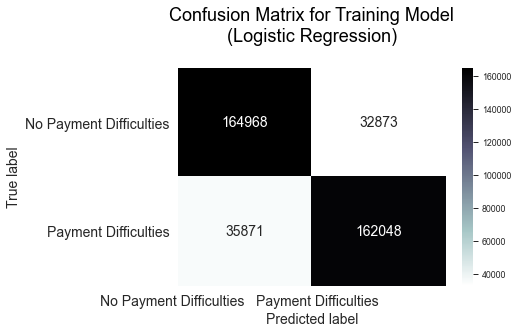

In [86]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [87]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     84845
           1       0.83      0.82      0.82     84767

    accuracy                           0.83    169612
   macro avg       0.83      0.83      0.83    169612
weighted avg       0.83      0.83      0.83    169612



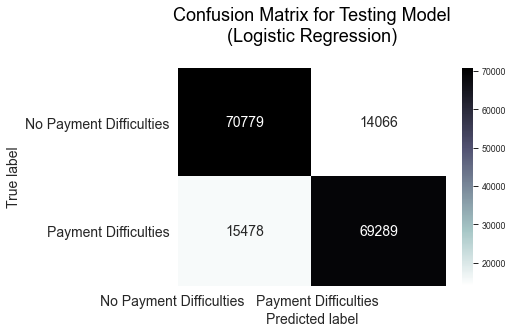

In [88]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [89]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))
     

Training Accuracy: % 82.63
Test Accuracy: % 82.58


In [90]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.8258


**Decision Tree**

In [91]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [92]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))
     

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197841
           1       1.00      1.00      1.00    197919

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760



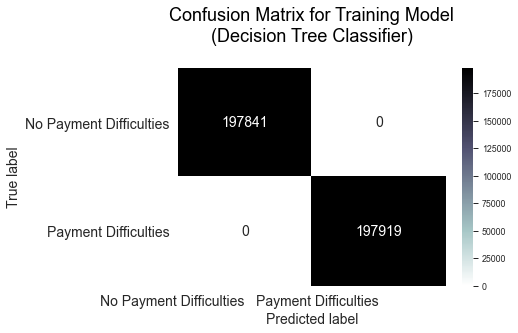

In [93]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [94]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.89      0.04      0.08     84845
           1       0.51      0.99      0.67     84767

    accuracy                           0.52    169612
   macro avg       0.70      0.52      0.37    169612
weighted avg       0.70      0.52      0.37    169612



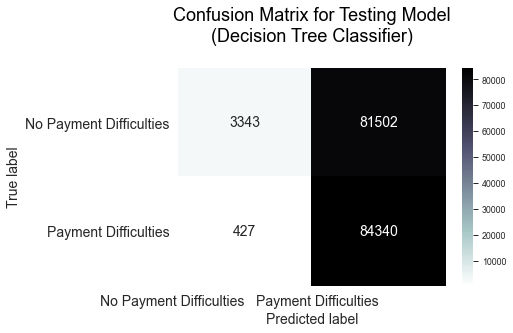

In [95]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [96]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 51.7


In [97]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)
     

ROC AUC: 0.5172


**Random Forest**

In [98]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [99]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197841
           1       1.00      1.00      1.00    197919

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760



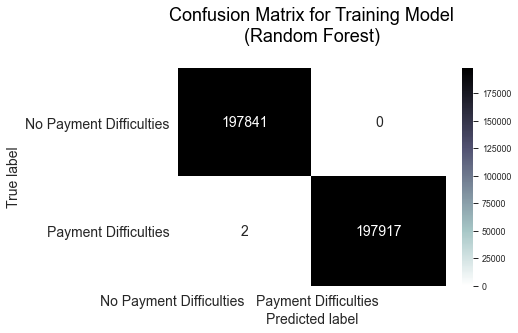

In [100]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [101]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.97      0.03      0.05     84845
           1       0.51      1.00      0.67     84767

    accuracy                           0.51    169612
   macro avg       0.74      0.51      0.36    169612
weighted avg       0.74      0.51      0.36    169612



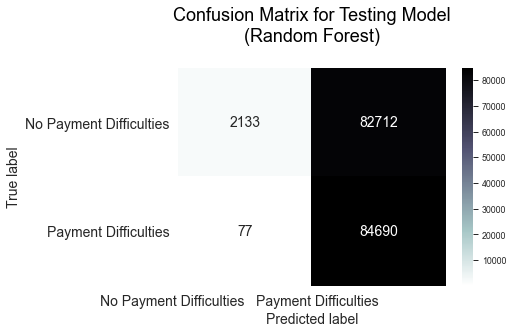

In [102]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [103]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 51.19


In [104]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.5121


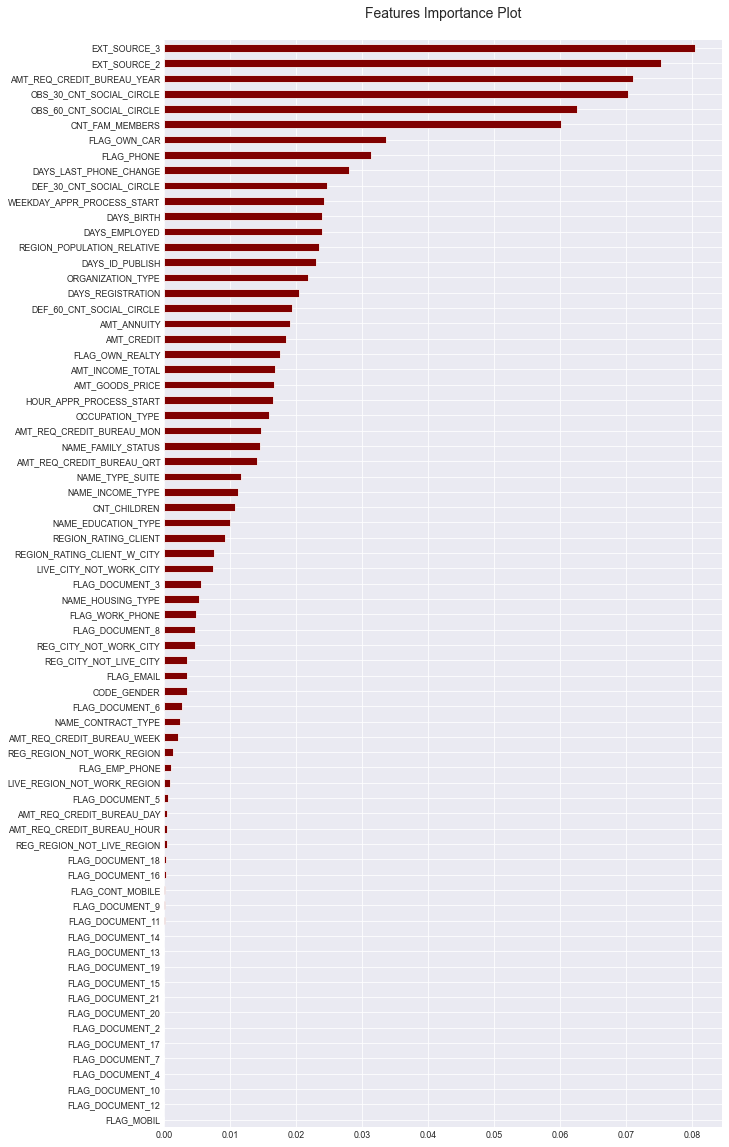

In [115]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=X_over_SMOTE.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,20))
fig = importances_rf.plot(kind ='barh', color ='maroon')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top_features.png')